In [66]:
from importlib import reload
import src.UNET
reload(src.UNET)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


In [50]:
PATCH_SIZE = 80

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])

#datagen = ImageDataGenerator(
 #   featurewise_std_normalization = True 
#)

#datagen.fit(x_train)

In [38]:
from keras.utils import to_categorical
y_tr = np.copy(y_test)
y_tr[y_tr >= 0.5] = 1
y_tr[y_tr < 0.5] = 0

array([0., 1.], dtype=float32)

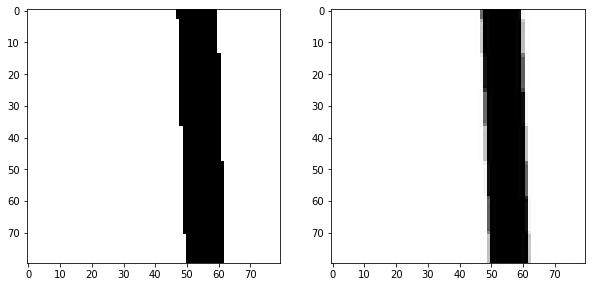

In [35]:

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(y_tr[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,2,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
np.unique(y_tr)

In [39]:
y_t = to_categorical(y_tr)

In [67]:
unet = UNET(image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers = 2)
unet.build_model()
model = unet.get_model()

Building model with 2 layers
Filtersizes being used in UNET: [64, 128, 256]
Bulding contraction layers at layer: 1 and filtersize: 64
Bulding contraction layers at layer: 2 and filtersize: 128
Building bottleneck at layer: 2 and filtersize: 256
Building expansion at layer: 2 and filtersize: 128
Building expansion at layer: 1 and filtersize: 64
Compiling model...
Model compiled.


In [68]:
model.load_weights('./models/weights04_13.10.h5')

In [54]:
model.evaluate(x_test, y_t)

75/75 [==============================] - 26s 345ms/step


[0.5951813888549805, 0.8101935386657715, 0.7937062382698059]

[0]


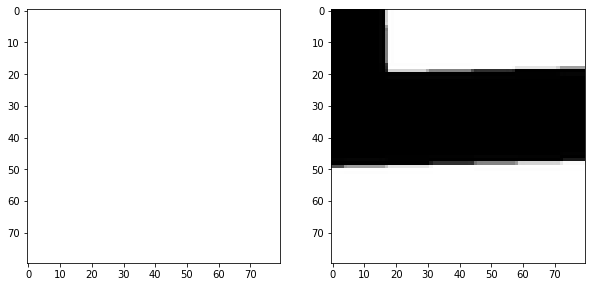

In [71]:
n = 11
pred = model.predict(x_train[n:n+1, :, :, :])
#pred[pred >= 0.5] = 1
#pred[pred < 0.5] = 0
pred = np.argmax(pred, axis = 3)
print(np.unique(pred))

f = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(pred[0].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,2,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')

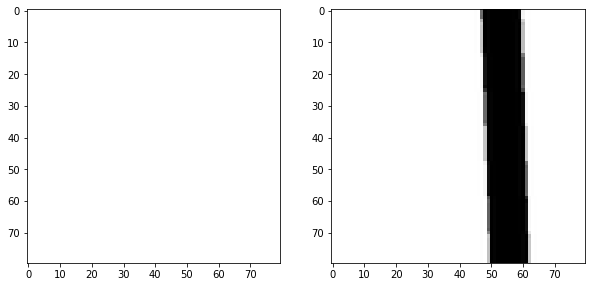

In [16]:
f = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(pred[0].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,2,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')